# <font color='red'>Depression, Axiety and Stress prediction</font>

## <font color='blue'>Introduction</font>

In this `jupyter-notebook` the [DSA dataset](https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales) is analysed using different Sklearn classification methods (inspired by this [site](https://www.codespeedy.com/multiclass-classification-using-scikit-learn/)):
* [Linear regression](#lin) ([link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html));
* [Gaussian Naive Bayes](#GNB) ([link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html));
* [Logistic Regression](#log) ([link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html));
* [K-Nearest Neighbors](#KNN) ([link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html));
* [Decision Tree](#DT) ([link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html));
* [Support Vector Machine](#SVM) ([link](https://scikit-learn.org/stable/modules/svm.html)).

### <font color='black'>Dataset</font>
#### <font color='grey'>Introduction</font>
This dataset is the result of an interactive version of the [Taylor Manifest Anxiety Scale](https://openpsychometrics.org/tests/TMAS/). The Taylor MAS was first developed in 1953 to identify individuals who would be good subjects for studies of stress and other related psychological phenomenon. Since then it has been used as a measure of anxiety as general personality trait. Anxiety is a complex psychological construct that includes a multiple of different facets related to extensive worrying that may impair normal functioning.

(see [Taylor, J. (1953). "A personality scale of manifest anxiety". The Journal of Abnormal and Social Psychology, 48(2), 285-290.](https://psycnet.apa.org/doiLanding?doi=10.1037%2Fh0056264) )


#### <font color='grey'>Method</font>
This data was collected with an on-line version of the Depression Anxiety Stress Scales (DASS), see ([link](http://www2.psy.unsw.edu.au/dass/)).

The survey was open to anyone and people were motivated to take it to get personalized results. At the end of the test they also were given the option to complete a short research survey. This datatset comes from those who agreed to complete the research survey and answered yes to the question "Have you given accurate answers and may they be used for research?" at the end.

This data was collected 2017 - 2019.

The following items were included in the survey:

Q1 I found myself getting upset by quite trivial things.\
Q2 I was aware of dryness of my mouth.\
Q3 I couldn't seem to experience any positive feeling at all.\
Q4 I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion).\
Q5 I just couldn't seem to get going.\
Q6 I tended to over-react to situations.\
Q7 I had a feeling of shakiness (eg, legs going to give way).
Q8 I found it difficult to relax.\
Q9 I found myself in situations that made me so anxious I was most relieved when they ended.\
Q10 I felt that I had nothing to look forward to.\
Q11 I found myself getting upset rather easily.\
Q12 I felt that I was using a lot of nervous energy.\
Q13 I felt sad and depressed.\
Q14 I found myself getting impatient when I was delayed in any way (eg, elevators, traffic lights, being kept waiting).\
Q15 I had a feeling of faintness.\
Q16 I felt that I had lost interest in just about everything.\
Q17 I felt I wasn't worth much as a person.\
Q18 I felt that I was rather touchy.\
Q19 I perspired noticeably (eg, hands sweaty) in the absence of high temperatures or physical exertion.\
Q20 I felt scared without any good reason.\
Q21 I felt that life wasn't worthwhile.\
Q22 I found it hard to wind down.\
Q23 I had difficulty in swallowing.\
Q24 I couldn't seem to get any enjoyment out of the things I did.\
Q25 I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, heart missing a beat).\
Q26 I felt down-hearted and blue.\
Q27 I found that I was very irritable.\
Q28 I felt I was close to panic.\
Q29 I found it hard to calm down after something upset me.\
Q30 I feared that I would be "thrown" by some trivial but unfamiliar task.\
Q31 I was unable to become enthusiastic about anything.\
Q32 I found it difficult to tolerate interruptions to what I was doing.\
Q33 I was in a state of nervous tension.\
Q34 I felt I was pretty worthless.\
Q35 I was intolerant of anything that kept me from getting on with what I was doing.\
Q36 I felt terrified.\
Q37 I could see nothing in the future to be hopeful about.\
Q38 I felt that life was meaningless.\
Q39 I found myself getting agitated.\
Q40 I was worried about situations in which I might panic and make a fool of myself.\
Q41 I experienced trembling (eg, in the hands).\
Q42 I found it difficult to work up the initiative to do things.

Each item was presented one at a time in a random order for each new participant along with a 4 point rating scale asking the user to indicate how often that had been true of them in the past week where

1 = Did not apply to me at all.\
2 = Applied to me to some degree, or some of the time.\
3 = Applied to me to a considerable degree, or a good part of the time.\
4 = Applied to me very much, or most of the time.

This response is stored in variable A (e.g. Q1A). Also recorded was the time taken in milliseconds to answer that question (E) and that question's position in the survey (I).

These other durations and variables were also recorded. In this analysis, only `Q..A` variables are used.

#### <font color='grey'>Y true calcolation</font>
For each user, after answering the 42 questions, the depression, anxiety and stress true levels were calculated according to this [table](DASS-42-Scoring.pdf). The levels are:
* Normal;
* Mild;
* Moderate;
* Severe;
* Extremely Severe.

### Libraries <a id='lib'></a>
Some [Python](https://www.python.org/) libraries are used:
* [Numpy](https://numpy.org/) is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more;
* [Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool;
* [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python;
* [Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib;
* [Sklearn](https://scikit-learn.org/stable/index.html) is an open source machine learning library that supports supervised and unsupervised learning.

Ad-hoc created functions, saved in the file `function.py`, are used in this analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC

import function as fn

## <font color='blue'>Loading the dataframe</font>
Using the [Pandas](https://pandas.pydata.org/) library and the `analysis_df()` function, the dataset (`\Data\data.cvs`) is uploaded and the depression, anxiety and stress true levels are calculated.

In [3]:
data = fn.analysis_df()

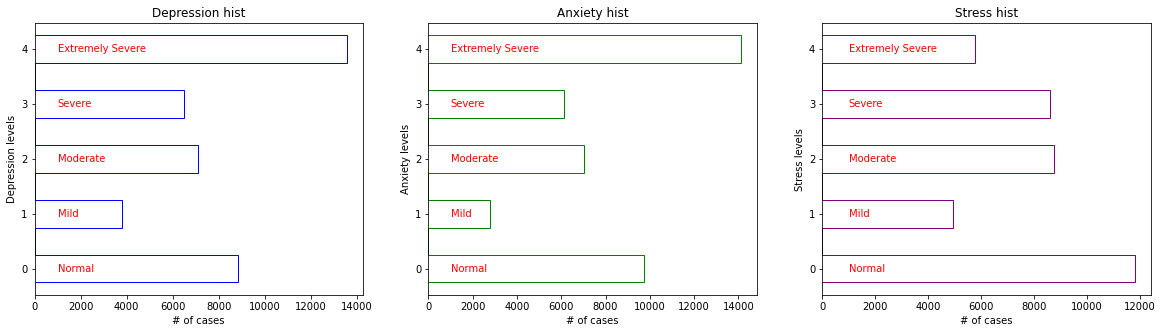

In [4]:
fn.show_data(data)

Using a Pandas tool, the correlation matrix is calculated.

$$
Cov(x,y) = \frac{1}{n} \sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)
$$
$$
Var(x) = \frac{1}{n} \sum_{i=1}^{n}(x_i - \mu_x)^2
$$


\begin{equation*}
K[X] = 
\begin{pmatrix}
\frac{Cov(x_1,x_1)}{Var(x_1)}  & \frac{Cov(x_1,x_2)}{\sqrt{Var(x_1)Var(x_2)}} & \cdots & \frac{Cov(x_1,x_n)}{\sqrt{Var(x_1)Var(x_n)}} \\
\frac{Cov(x_2,x_1)}{\sqrt{Var(x_2)Var(x_1)}} & \frac{Cov(x_2,x_2)}{Var(x_2)} & \cdots & \cdots \\
\vdots  & \vdots  & \ddots & \vdots  \\
\frac{Cov(x_n,x_1)}{\sqrt{Var(x_n)Var(x_1)}} & \cdots & \cdots & \frac{Cov(x_n,x_n)}{Var(x_n)}
\end{pmatrix}
\end{equation*}


In [5]:
corr = data[fn.index_q()].corr()
corr.style.background_gradient(cmap='coolwarm')

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
Q1A,1.000000,0.313892,0.471160,0.383148,0.463153,0.561147,0.384719,0.476629,0.472160,0.447964,0.675197,0.467594,0.544893,0.438006,0.370233,0.463865,0.494978,0.488620,0.315128,0.490217,0.473931,0.489425,0.330927,0.461032,0.362875,0.508476,0.577332,0.463136,0.581558,0.485789,0.434923,0.489339,0.470296,0.500997,0.482193,0.500145,0.432943,0.462554,0.530302,0.477333,0.357084,0.406998
Q2A,0.313892,1.000000,0.280429,0.368386,0.283518,0.280526,0.372905,0.304325,0.326041,0.271440,0.312217,0.325422,0.303000,0.287128,0.346363,0.294779,0.292076,0.274846,0.332374,0.339882,0.286310,0.306771,0.381415,0.286927,0.355514,0.299158,0.298170,0.330895,0.316548,0.323629,0.282681,0.305104,0.320008,0.296306,0.303520,0.349774,0.264619,0.274943,0.292185,0.325050,0.354609,0.257856
Q3A,0.471160,0.280429,1.000000,0.361023,0.581811,0.397500,0.352628,0.494488,0.379789,0.634080,0.477611,0.417047,0.622824,0.304667,0.380732,0.627940,0.581771,0.352053,0.280814,0.440571,0.629913,0.483612,0.342175,0.646055,0.331256,0.595587,0.460784,0.417764,0.466071,0.401999,0.637040,0.406417,0.439770,0.591424,0.421084,0.465794,0.614624,0.623590,0.457672,0.377319,0.328722,0.497231
Q4A,0.383148,0.368386,0.361023,1.000000,0.358538,0.367246,0.547515,0.432835,0.424343,0.339142,0.380325,0.466664,0.391223,0.315438,0.501334,0.347226,0.359382,0.312192,0.420823,0.464838,0.368380,0.415691,0.478987,0.350059,0.564600,0.375120,0.371950,0.529148,0.414810,0.377297,0.338209,0.356853,0.479857,0.358448,0.355049,0.459700,0.327832,0.356310,0.402927,0.417630,0.517032,0.316833
Q5A,0.463153,0.283518,0.581811,0.358538,1.000000,0.393801,0.362974,0.496684,0.395863,0.593143,0.468036,0.440158,0.604386,0.311924,0.382904,0.596428,0.560192,0.361775,0.289849,0.439632,0.582881,0.504043,0.327673,0.592059,0.339514,0.591401,0.471437,0.430394,0.450735,0.427507,0.588730,0.422473,0.463412,0.568624,0.425952,0.448643,0.558653,0.570407,0.484787,0.393084,0.340587,0.609554
Q6A,0.561147,0.280526,0.397500,0.367246,0.393801,1.000000,0.370389,0.467014,0.446728,0.367636,0.571949,0.463327,0.445186,0.420224,0.344584,0.369819,0.421711,0.447935,0.308532,0.454957,0.397796,0.461287,0.311744,0.376601,0.343408,0.422993,0.533804,0.475215,0.545548,0.422090,0.351283,0.450848,0.458601,0.423395,0.448886,0.452380,0.356712,0.381502,0.492798,0.463147,0.347067,0.357075
Q7A,0.384719,0.372905,0.352628,0.547515,0.362974,0.370389,1.000000,0.429663,0.431744,0.337128,0.376601,0.482828,0.388456,0.325199,0.515252,0.346458,0.360642,0.315488,0.460287,0.470781,0.363278,0.410253,0.465586,0.343739,0.492958,0.375291,0.371158,0.526059,0.413812,0.400372,0.337028,0.360224,0.488379,0.365255,0.358717,0.467220,0.326834,0.351445,0.406576,0.433517,0.662210,0.318009
Q8A,0.476629,0.304325,0.494488,0.432835,0.496684,0.467014,0.429663,1.000000,0.459991,0.445272,0.485234,0.554181,0.522788,0.375820,0.410454,0.457787,0.444742,0.379804,0.337770,0.491369,0.455985,0.609108,0.368750,0.488976,0.412330,0.495314,0.479999,0.538745,0.541079,0.426832,0.461250,0.443395,0.579896,0.449605,0.436260,0.489328,0.423518,0.445202,0.521563,0.440076,0.402429,0.442490
Q9A,0.472160,0.326041,0.379789,0.424343,0.395863,0.446728,0.431744,0.459991,1.000000,0.378774,0.470592,0.543484,0.446015,0.374840,0.368037,0.386161,0.427443,0.366202,0.374227,0.526382,0.386718,0.436332,0.334037,0.384942,0.418307,0.423223,0.434814,0.550210,0.487749,0.506114,0.370784,0.418116,0.546432,0.431244,0.407296,0.524519,0.370932,0.372759,0.447310,0.573033,0.422462,0.361873
Q10A,0.447964,0.271440,0.634080,0.339142,0.593143,0.367636,0.337128,0.445272,0.378774,1.000000,0.460060,0.391456,0.623254,0.290505,0.356153,0.646754,0.647539,0.346882,0.271002,0.433580,0.698707,0.444820,0.321098,0.615489,0.318157,0.595282,0.449612,0.394933,0.431346,0.413304,0.608497,0.388190,0.403634,0.654799,0.396693,0.453522,0.730096,0.698367,0.434843,0.38

## <font color='blue'>Train and Test Dataframe</font>
In order to create and test the models, once the dataset is loaded, it is divided into training set (80%) and test set (20%) to avoid introducing bias into the analysis.

In [6]:
# splits the training and test data set in 80% : 20%
X_train, X_test, Y_train, Y_test = fn.train_test_splitting(data,0.2)

X, Y train/test shape
(31820, 42)
(7955, 42)
(31820, 3)
(7955, 3)




## <font color='blue'>Linear Regression Classification</font> <a id='lin'></a>
Given a vector of inputs $\vec{x}^T = (x_1, x_2, \dots, x_p)$, the output $y$ is predicted via the model:

$$
\hat{y} = \hat{\beta}_0 + \sum_{j=1}^{p}x_j\hat{\beta}_j
$$

The term $\hat{\beta}_0$ is the intercept, also known as the $\textit{bias}$ in machine learning. Often it is convenient to include the constant variable $1$ in $\vec{x}$, include $\hat{\beta}_0$ in
the vector of coefficients $\hat{\beta}$ and then write the linear model in vector form as an inner product:

$$
\hat{y} = \vec{x}^T \hat{\beta}
$$

where $\vec{x}^T$ denotes vector or matrix transpose (X being a column vector). By minimasing the cost function $C({\beta})$:

$$
C({\beta}) = \sum_{i}^{N}(y_i^{true}-\hat{y}_i)^2 = \sum_{i}^{N}(y_i^{true}-x_i^T\beta)^2
$$

the solution of the linear regression problem is:

$$
\hat{\beta} = (X^TX)^{-1}X^T\textbf{y}
$$

The output $\hat{y}$ is a scalar $\epsilon\ \mathbb{R}$, but this is a classification problem, so a discrete output ($\hat{y}\ \epsilon\ \mathbb{R} \rightarrow \mathbb{K}$) was obtained as:

$$
\hat{y}_{\mathbb{K}} \simeq\bigg \{
				\begin{array}{rl}
					int(\hat{Y}_{\mathbb{R}}) & if \ \hat{Y}_{\mathbb{R}} - int(\hat{Y}_{\mathbb{R}}) \le cut\\
					int(\hat{Y}_{\mathbb{R}})+1 & if \ \hat{Y}_{\mathbb{R}} - int(\hat{Y}_{\mathbb{R}}) > cut\\
				\end{array}
$$

where $cut\ \epsilon\ [0,1]$ and it was optimised on a case-by-case basis using the function `find_best_cut`.

The Sklearn tool `LinearRegression()`, with default settings, was used to create the model. The model performances were evaluated using other Sklearn tools:
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): the higher this value, the better the model is (# of right prediction / # of all prediction);
* [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html): root mean squared error regression loss. If the training$_{RMSE}\simeq$ test$_{RMSE}$ it is okay, but if training$_{RMSE}\ll$ test$_{RMSE}$ the model could be in an overfitting condition.
<img src="Image/overfitting.png" width="500"><a id='GDLan'></a>


* [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html): $R^2$ (coefficient of determination) regression score function. Best possible score is $1.0$ and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of $0.0$.

The total model accuracy was obtained averaging over the depression, anxiety and stress accuracies.



(see [T. Hastie, R. Tibshirani, J. Friedman, "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." cap 2.3.1](https://hastie.su.domains/ElemStatLearn/))

* Training


The best cuts and the performances
- Depression
0.4 0.7130735386549341
- Anxiety
0.43 0.5648648648648649
- Stress
0.41 0.8593966059082339


The model accuracy = 0.7418569732523224


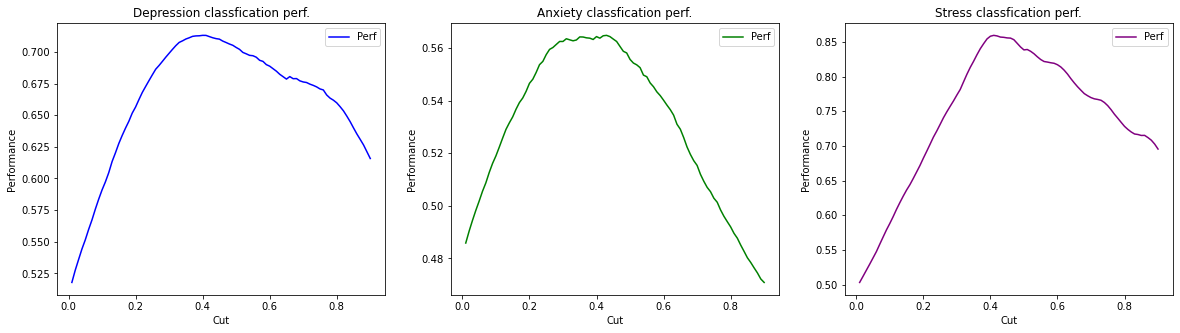

The model performance for training set
--------------------------------------
RMSE is 0.5474642993104525
R2 score is 0.8758060998746781


* Test


The best cuts and the performances
- Depression
0.42 0.718541797611565
- Anxiety
0.39 0.572972972972973
- Stress
0.41 0.8580766813324953


The model accuracy = 0.7385487813394792


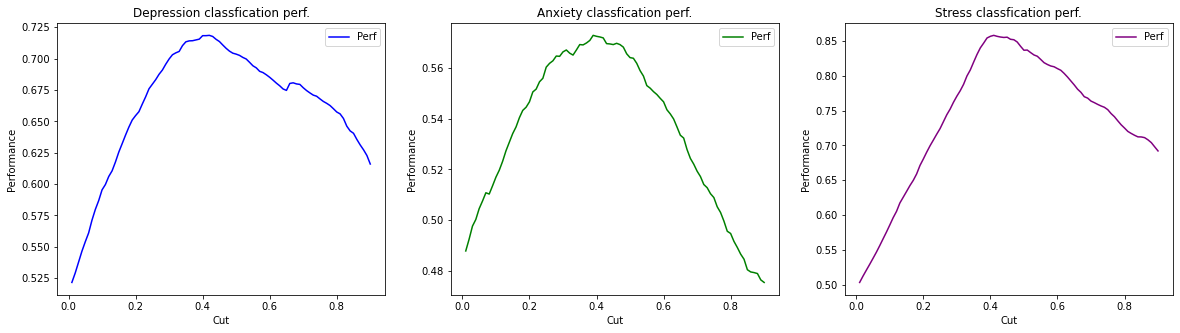

The model performance for testing set
--------------------------------------
RMSE is 0.5452497568062706
R2 score is 0.8754970208259669




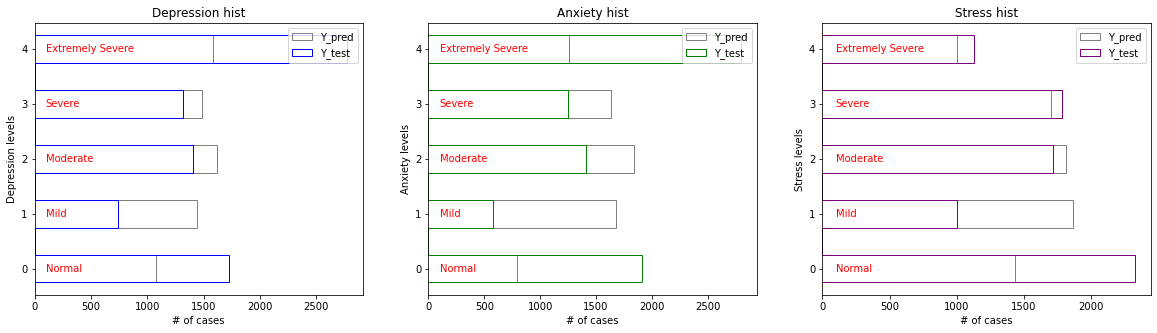

In [7]:
Y_pred_lin = fn.linear_regression(data,X_train,X_test,Y_train,Y_test)

After using the `find_best_cut()` function, it has been found that:
* in depression prediction the best cut and performance are:
    * training -> 0.4 0.7130735386549341;
    * test -> 0.42 0.718541797611565
* in anxiety prediction the best cut and performance are:
    * training -> 0.43 0.5648648648648649
    * test -> 0.39 0.572972972972973
* in stress prediction the best cut and performance are:
    * training -> 0.41 0.8593966059082339
    * test -> 0.41 0.8580766813324953
    
The train and test errors are similar so the model is not in a overfitting condition. 

A good agreement between predictions and truths can be seen in the histograms. The model accuracy is 0.7385487813394792.

## <font color='blue'>Gaussian Naive Bayes Classification</font> <a id='GNB'></a>
Decision theory for classification theory says that it is necessary to know the class posteriors $Pr(G|X)$ for optimal classification. Suppose $f_k(x)$ is the class-conditional density $P$ of $X$ in class $G = k$, and let $\pi_k$ be the prior probability of class $k$, with $\sum_{k=1}^{K} \pi_k = 1$. A simple application of Bayes theorem gives:

$$
Pr(G|X) = \frac{f_k(x) \pi_k}{\sum_{l=1}^{K}f_l(x) \pi_l}
$$

In terms of ability to classify, having the $f_k(x)$ is almost equivalent to having the quantity $Pr(G = k|X = x)$.
Many techniques are based on models for the class densities, e.g. linear and quadratic discriminant analysis use Gaussian densities. Each class density is assumed to be modelled as multivariate Gaussian:

$$
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}e^{\frac{-1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}
$$

Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $\Sigma_k = \Sigma\ \forall k$. In comparing two classes $k$ and $l$, it is sufficient to look at the log-ratio:

$$
log\frac{Pr(G=k|X=x)}{Pr(G=l|X=x)} = log\frac{\pi_k}{\pi_l} -\frac{1}{2}(\mu_k+\mu_l)^T\Sigma_k^{-1}(\mu_k-\mu_l) + x^T\Sigma_k^{-1}(\mu_k-\mu_l)
$$

From the previous equation,the linear discriminant functions:

$$
\delta_k(x) = x^T\Sigma_k^{-1}\mu_k -\frac{1}{2}(\mu_k)^T\Sigma_k^{-1}(\mu_k) + log\pi_k
$$

are an equivalent description of the decision rule, with $G(x) = argmax_k\delta_k(x)$. With 2 classes {1,2}, the LDA rule classifies to class 2 if:

$$
x^T\Sigma_k^{-1}(\hat{\mu}_2 - \hat{\mu}_1) > \frac{1}{2}(\hat{\mu}_2 + \hat{\mu}_1)^T\Sigma_k^{-1}(\hat{\mu}_2 - \hat{\mu}_1) - log(N_2/N_1)
$$

and class 1 otherwise. If the $\Sigma_k$ are not assumed to be equal, then the convenient cancellations in LDA equation do not
occur; in particular the pieces quadratic in $x$ remain: $\textit{quadratic discriminant functions}$ (QDA):

$$
\delta_k(x) = -\frac{1}{2}log|\Sigma_k| -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) + log\pi_k
$$

The Sklearn tool `GaussianNB()`, with default settings, was used to create the model. The model performances were evaluated as Linear regression.

### <font color='grey'>Degrees of freedom analysis</font> <a id='GDL'></a>
As shown in this [figure](#GDLan), creating a model with many measurements and many features (therefore a very complex model) is not the best choice: training$_{RMSE}\ll$ test$_{RMSE}$. In this condition, the model could be in an overfitting condition. A solution could be to reduce the size of the feature space: if two variables have a high correlation:

$$
Cov(QiA,QjA) > cut
$$

only one is kept. Then by varying the cut $\epsilon [0,1]$ (hence the model complexity),  training$_{RMSE}$ and test$_{RMSE}$ were analysed. In conclusion, the number of degrees of freedom were chosen so as to ensure the best test$_{RMSE}$ and the smallest difference between  test$_{RMSE}$ and training$_{RMSE}$, as shown in [figure](#GDLan).

If the test$_{RMSE}\simeq const$ as the degrees of freedom increase, the minimum number of degrees of freedom is chosen to avoid overfitting and increasing computational cost.

(see [T. Hastie, R. Tibshirani, J. Friedman, "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." cap 4.3](https://hastie.su.domains/ElemStatLearn/))

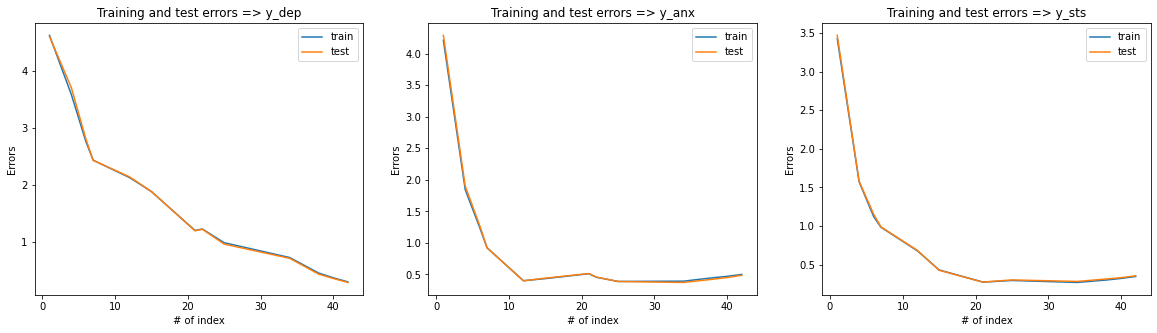

In [8]:
gnb = GaussianNB()
fn.error_show(gnb,data,X_train, X_test, Y_train, Y_test)

* In the depression prediction, the best choice of degrees of freedom is the maximum number.
* In anxiety prediction, in order to avoid overfitting and increasing computational cost, the number of degrees of freedom chosen is 30.
* In stress prediction, in order to avoid overfitting and increasing computational cost, the number of degrees of freedom chosen is 25.

In [9]:
index_dep = fn.index_q()
print(len(index_dep))
index_anx = fn.index_reduction(data,0.67)
print(len(index_anx))
index_sts = fn.index_reduction(data,0.65)
print(len(index_sts))

index_training = [index_dep, index_anx, index_sts]

42
30
25


* y_dep


The model performance for training set
--------------------------------------
RMSE is 0.545019158463622
R2 score is 0.8774745138104199


The model performance for testing set
--------------------------------------
RMSE is 0.5358311506423856
R2 score is 0.8806737126971457


0.7445631678189818
######################################


* y_anx


The model performance for training set
--------------------------------------
RMSE is 0.5852792958748508
R2 score is 0.8648668632190333


The model performance for testing set
--------------------------------------
RMSE is 0.5709277683351819
R2 score is 0.8697783967332257


0.7309868007542426
######################################


* y_sts


The model performance for training set
--------------------------------------
RMSE is 0.5419834606821949
R2 score is 0.8575586179267112


The model performance for testing set
--------------------------------------
RMSE is 0.5484679536362479
R2 score is 0.8529819086558875


0.7360150848522942
#######

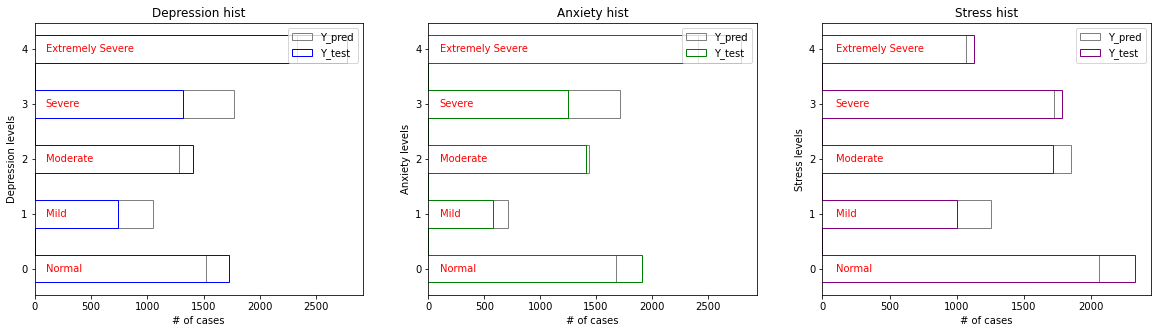

In [10]:
Y_pred_GBN = fn.classification(gnb, X_train, X_test, Y_train, Y_test, index_training)

After using the `classification()` function it has been found that:
* in depression prediction the results are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.7445631678189818.
    * an excellent agreement between predictions and truths can be seen in the histograms.
* in anxiety prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.7309868007542426.
    * an excellent agreement between predictions and truths can be seen in the histograms.
* in stress prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.7360150848522942.
    * an excellent agreement between predictions and truths can be seen in the histograms.
    
The total model performance is 0.7371883511418394.

## <font color='blue'>Logistic Regression Classification</font> <a id='log'></a>
The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $x$, while at the same time ensuring that they sum to one and remain in $[0, 1]$. The model has the form:

$$
log\frac{P(G=l|X=x)}{P(G=K|X=x)} = \beta_{l_o} + \beta_l^Tx
$$

The model is specified in terms of $K − 1$ log-odds or logit transformations (reflecting the constraint that the probabilities sum to one). Although the model uses the last class as the denominator in the odds-ratios, the choice of denominator is arbitrary in that the estimates are equivariant under this choice. A simple calculation shows that:

$$
P(G=k|X=x) = \frac{exp(\beta_{k_o} + \beta_k^Tx)}{1+\sum_{l=1}^{K-1}exp(\beta_{l_o} + \beta_l^Tx)},\ \ \ k\neq K
$$
$$
P(G=K|X=x) = \frac{1}{1+\sum_{l=1}^{K-1}exp(\beta_{l_o} + \beta_l^Tx)}
$$

In order to get a simpler notation $P(G=k|X=x)=p_k(x;\theta)$. Logistic regression models are usually fit by maximum likelihood, using the conditional likelihood of $G$ given $X$. Using $K=2$, the log-likelihood for $N$ observations is $cross\ entropy$:

$$
C({\underline{\beta}}) = -\sum_{i=1}^{N}y_i[p_1(\underline{x}_i;\underline{\beta})] + (1-y_i)[1-p_1(\underline{x}_i;\underline{\beta})]
$$

$$
\vec{g}(\underline{\beta}) = \vec{\nabla}_{\underline{\beta}}C(\underline{\beta})=-X^T(\vec{g}_i - \hat{p}_i)
$$

$$
H(\underline{\beta}) = X^TWX, \ \ \ W = diag\{\hat{p}_i(1-\hat{p}_i)\}
$$

So using the Iteratively Reweighted Least Square (IRLS) method, similar to the newton method:

$$
\vec{\beta}_{t+1} = \vec{\beta}_{t} - H(\vec{\beta}_t)^{-1}\vec{g}(\vec{\beta}_t)
= \vec{\beta}_{t} + (X^TWX)^{-1}X^T(\vec{y}-\hat{\vec{\beta}})
= (X^TWX)^{-1}X^TW( X\vec{\beta}_{t} + W^{-1}\vec{y}-\hat{\vec{\beta}})
$$

with $\vec{z}=X\vec{\beta}_{t} + W^{-1}\vec{y}-\hat{\vec{\beta}}$:

$$
\vec{\beta}_{t+1} = (X^TWX)^{-1}X^TW\vec{z}
$$

So using the minimisation process IRLS:

$$
\vec{\beta}_{t+1} = argmin\{(\vec{z}-X\vec{\beta})^TW_t(\vec{z}-X\vec{\beta})\}
$$

The Sklearn tool `LogisticRegression(multi_class='multinomial', max_iter=10000)` was used to create the model:
* `multi_class`: for 'multinomial' the loss minimised is the multinomial loss fit across the entire probability distribution;
* `max_iter`: maximum number of iterations taken for the solvers to converge. 

The model performances were evaluated as Linear regression and the degrees of freedom analysis was done as [GBN analysis](#GDL).

(see [T. Hastie, R. Tibshirani, J. Friedman, "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." cap 4.4](https://hastie.su.domains/ElemStatLearn/))

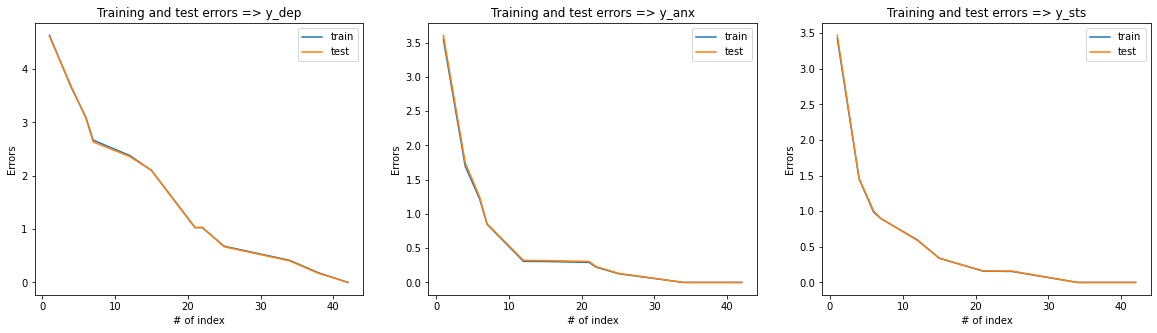

In [7]:
logreg = LogisticRegression(multi_class='multinomial', max_iter=10000)
fn.error_show(logreg,data,X_train, X_test, Y_train, Y_test)

* In the depression prediction, in order to avoid overfitting, the best choice of degrees of freedom is 38.
* In anxiety prediction, in order to avoid overfitting and increasing computational cost, the number of degrees of freedom chosen is 22.
* In stress prediction, in order to avoid overfitting and increasing computational cost, the number of degrees of freedom chosen is 22.

In [20]:
index_dep = fn.index_reduction(data,0.75)
print(len(index_dep))
index_anx = fn.index_reduction(data,0.64)
print(len(index_anx))
index_sts = fn.index_reduction(data,0.64)
print(len(index_sts))

index_training = [index_dep, index_anx, index_sts]

38
22
22


* y_dep


The model performance for training set
--------------------------------------
RMSE is 0.42257181523624515
R2 score is 0.9263447087887013


The model performance for testing set
--------------------------------------
RMSE is 0.4099638959437437
R2 score is 0.9301491917145726


0.8345694531741044
######################################


* y_anx


The model performance for training set
--------------------------------------
RMSE is 0.4719338499917869
R2 score is 0.9121386660214026


The model performance for testing set
--------------------------------------
RMSE is 0.4805454684033728
R2 score is 0.9077450500574376


0.8066624764299183
######################################


* y_sts


The model performance for training set
--------------------------------------
RMSE is 0.3963615159024622
R2 score is 0.9238189291768085


The model performance for testing set
--------------------------------------
RMSE is 0.4014430287631756
R2 score is 0.9212381140396355


0.8426147077309868
#####

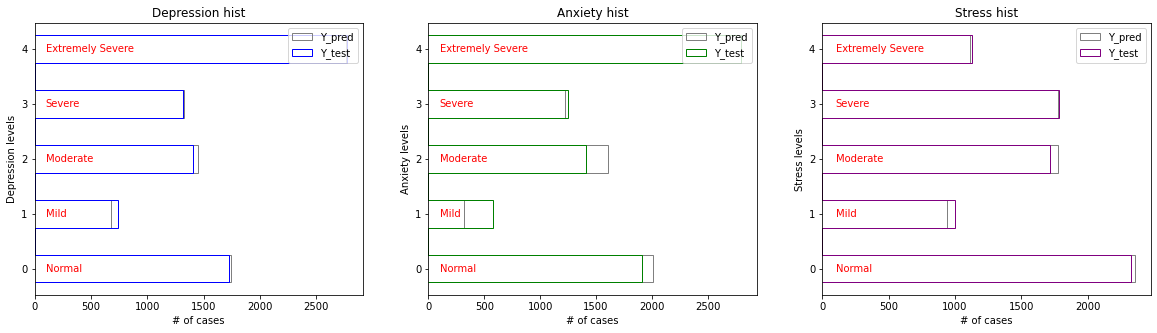

In [21]:
Y_pred_log = fn.classification(logreg, X_train, X_test, Y_train, Y_test, index_training)

After using the `classification()` function it has been found that:
* in depression prediction the results are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.8345694531741044.
    * an almost perfect agreement between predictions and truths can be seen in the histograms.
* in anxiety prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.8066624764299183.
    * an almost perfect agreement between predictions and truths can be seen in the histograms.
* in stress prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.8426147077309868.
    * an almost perfect agreement between predictions and truths can be seen in the histograms.
    
The total model performance is 0.8279488791116698.

## <font color='blue'>KNN Classification</font> <a id='KNN'></a>
K nearest neighbor (KNN) classifier is a non-parametric classifier. It simply “looks at” the $K$ points in the training set that are nearest to the test input $x$, counts how many members of each class are in this set, and returns that empirical fraction as the estimate, as illustrated in [figure](#KNNfig).
<img src="Image/KNN.png" width="700"><a id='KNNfig'></a>

More formally:

$$
p(y=c|\textbf{x},D,K) = \frac{1}{K} \sum_{i\epsilon N_K(\textbf{x},D)}\mathbb{I}(y_i=c)
$$

where $N_K (x, D)$ are the (indices of the) $K$ nearest points to $\textbf{x}$ in $D$ and $\mathbb{I}(e)$ is the indicator function defined as follows:

$$
\mathbb{I}(e) = \bigg \{
				\begin{array}{rl}
					1 & if \ e\ is\ true\\
					0 & if \ e\ is\ false\\
				\end{array}
$$

This method is an example of memory-based learning or instance-based learning.

The Sklearn tool `KNeighborsClassifier(n_neighbors=6,algorithm='ball_tree')` was used to create the model:
* `n_neighbors`: the number of nearest neighbours analysed. It was chosen equal 6 based on the model performance;
* `algorithm='ball_tree'`: a ball tree is a binary tree in which every node defines a $D$-dimensional hypersphere, or ball, containing a subset of the points to be searched. Each internal node of the tree partitions the data points into two disjoint sets which are associated with different balls. While the balls themselves may intersect, each point is assigned to one or the other ball in the partition according to its distance from the ball's center. Each leaf node in the tree defines a ball and enumerates all data points inside that ball (see [Omohundro, Stephen M. (1989) "Five Balltree Construction Algorithms"](https://www.semanticscholar.org/paper/Five-Balltree-Construction-Algorithms-Omohundro/28fd6c26d45eec7b7586e28e3a5cfef2a7b1375c)).

The model performances were evaluated as Linear regression and the degrees of freedom analysis was done as [GBN analysis](#GDL).

(see [Murphy, Kevin P.. “Machine learning - a probabilistic perspective.” Adaptive computation and machine learning series (2012)](https://www.semanticscholar.org/paper/Machine-learning-a-probabilistic-perspective-Murphy/25badc676197a70aaf9911865eb03469e402ba57))

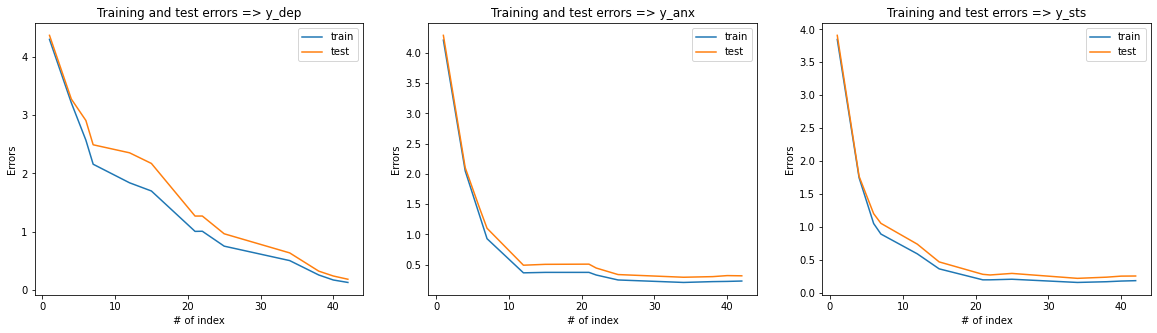

In [22]:
clf = KNeighborsClassifier(n_neighbors=6,algorithm='ball_tree')
fn.error_show(clf, data, X_train, X_test, Y_train, Y_test)

* In the depression prediction, in order to avoid overfitting, the best choice of degrees of freedom is the maximum number.
* In anxiety prediction, in order to avoid overfitting and increasing computational cost, the number of degrees of freedom chosen is 22.
* In stress prediction, in order to avoid overfitting and increasing computational cost, the number of degrees of freedom chosen is 22.

In [24]:
index_dep = fn.index_reduction(data,1)
print(len(index_dep))
index_anx = fn.index_reduction(data,0.64)
print(len(index_anx))
index_sts = fn.index_reduction(data,0.64)
print(len(index_sts))

index_training = [index_dep, index_anx, index_sts]

42
22
22


* y_dep


The model performance for training set
--------------------------------------
RMSE is 0.36213800495433607
R2 score is 0.9459057496964539


The model performance for testing set
--------------------------------------
RMSE is 0.43133109281375365
R2 score is 0.9226782376496391


0.8214959145191704
######################################


* y_anx


The model performance for training set
--------------------------------------
RMSE is 0.5727962442246484
R2 score is 0.8705697295418997


The model performance for testing set
--------------------------------------
RMSE is 0.6658595575237277
R2 score is 0.8228725049279163


0.712884978001257
######################################


* y_sts


The model performance for training set
--------------------------------------
RMSE is 0.4394871589892073
R2 score is 0.9063394956432617


The model performance for testing set
--------------------------------------
RMSE is 0.5167222518979967
R2 score is 0.8695083886272901


0.7609050911376493
#####

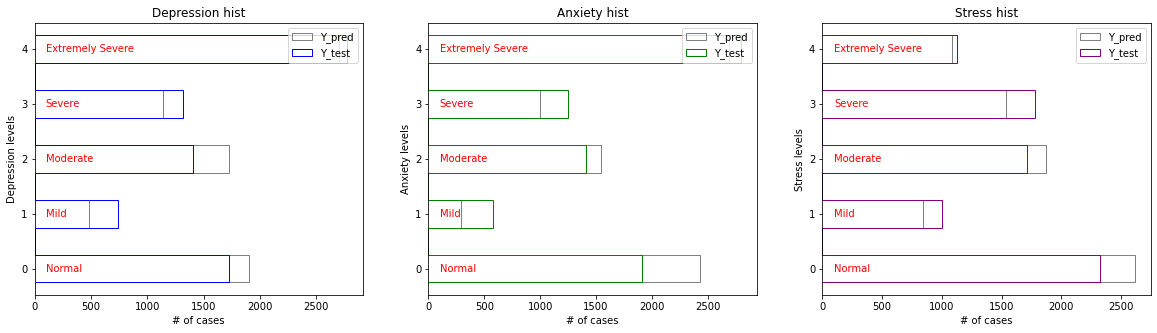

In [26]:
Y_pred_KNN = fn.classification(clf, X_train, X_test, Y_train, Y_test, index_training)

After using the `classification()` function it has been found that:
* in depression prediction the results are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.8214959145191704.
    * an excellent agreement between predictions and truths can be seen in the histograms.
* in anxiety prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.712884978001257.
    * a good agreement between predictions and truths can be seen in the histograms.
* in stress prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.7609050911376493.
    * an excellent agreement between predictions and truths can be seen in the histograms.
    
The total model performance is 0.7650953278860255.

## <font color='blue'>DT Classification</font> <a id='DT'></a>
Tree-based methods partition the feature space into a set of rectangles ($R_m \subseteq \mathbb{R}^p, \bigcup_{m=1}^MR_m=\mathbb{R}^p$), and then fit a simple model (like a constant) in each one. They are conceptually simple yet powerful. The classification algorithm chooses a prediction such as:

$$
\hat{y} = f(\underline{x}) = \sum_{m=1}^M c_m\mathbb{I}(\underline{x}\ \epsilon\ R_m)
$$

with a general cost function $C$:

$$
C = \frac{1}{N}\sum_{i}(y_i - \hat{y}_i)^2 = \frac{1}{N}\sum_{i}(y_i - \sum_mc_m\mathbb{I}_m)^2
$$

Minimising the C function to train the DT ($R_m$ are fixed):

$$
\frac{\partial C}{\partial c_m} = \frac{2}{N}\sum_i(y_i - \sum_{m'}c_{m'}\mathbb{I}_{m'}) = 0
$$

$$
c_m = \{\sum_i y_i\mathbb{I}(\underline{x}\epsilon R_m)\}\frac{1}{N_m}
$$

A method called CART is used to create classification decision trees:
* in a node $m$, representing a region $R_m$ with $N_m$ observations, let
$$
    \hat{p}_{mk} = \frac{1}{N_m} \sum_{x_i\epsilon R_m} \mathbb{I}(y_i= k)
$$

$$
\Rightarrow c_m = argmax_k(p_{mk})
$$

* starting with all of the data, consider a splitting variable $j$ and split point $s$, and define the pair of half-planes:

  $$
  R_1(j,s) = \{\underline{x}|x_j\leq s\};\ \ R_2(j,s) = \{\underline{x}|x_j > s\}
  $$

  where $j = 0,1,\dots,p$ and $s\epsilon\mathbb{R}$;
  
* then one looks for the division variable $j$ and the division point $s$ which solve

  $$
  min_{j,s}\biggl\{\frac{N_1^{(n)}}{N_n}Q_1 + \frac{N_2^{(n)}}{N_n}Q_2\biggl\}
  $$
  
  where $N_n = \sum_i \mathbb{I}(x_i\epsilon R_n)$, $N_1 = \sum_i \mathbb{I}(x_i\epsilon R_1)$ and $Q_1$ is the node impurity. Different measures $Q_m$ of node impurity include the following:
  
  $$
  Q_m = \Bigg\{ \begin{array}{rl}
					\frac{1}{N_m} \sum_{x_i\epsilon R_m} \mathbb{I}(y_i \neq k) & Misclassification\ error\\
					\sum_{k\neq k'} \hat{p}_{mk}\hat{p}_{mk'} = \sum_{k=1}^K\hat{p}_{mk}(1-\hat{p}_{mk}) & Gini\ index\\
                    -\sum_{k=1}^K\hat{p}_{mk}log(\hat{p}_{mk}) & X\ entropy\\
		\end{array}
  $$
  
  
  
The Sklearn tool `DecisionTreeClassifier()` with default settings, was used to create the model. The model performances were evaluated as Linear regression and the degrees of freedom analysis was done as [GBN analysis](#GDL).

(see [T. Hastie, R. Tibshirani, J. Friedman, "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." cap 9.2](https://hastie.su.domains/ElemStatLearn/))

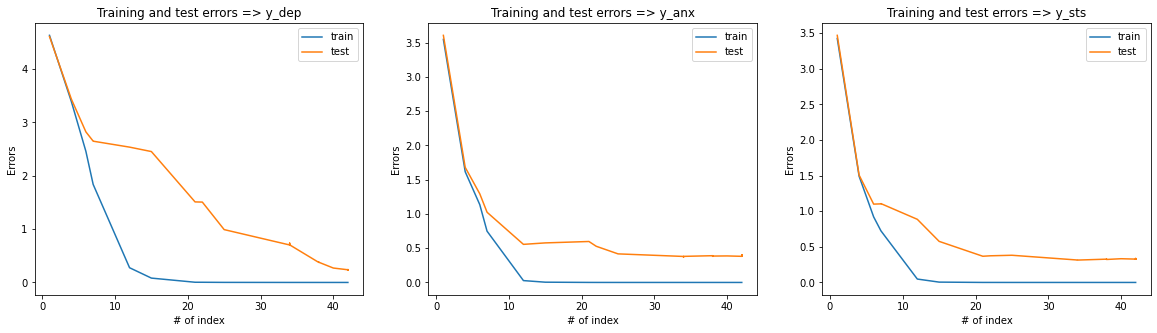

In [27]:
DT = tree.DecisionTreeClassifier()
fn.error_show(DT, data, X_train, X_test, Y_train, Y_test)

* In the depression prediction, in order to avoid overfitting and the increasing of the difference between test and training errors , the best choice of degrees of freedom is 7.
* In anxiety prediction, in order to avoid overfitting and the increasing of the difference between test and training errors , the best choice of degrees of freedom is 7.
* In stress prediction, in order to avoid overfitting and the increasing of the difference between test and training errors , the best choice of degrees of freedom is 6.

In [37]:
index_dep = fn.index_reduction(data,0.54)
print(len(index_dep))
index_anx = fn.index_reduction(data,0.54)
print(len(index_anx))
index_sts = fn.index_reduction(data,0.52)
print(len(index_sts))

index_training = [index_dep, index_anx, index_sts]

7
7
6


* y_dep


The model performance for training set
--------------------------------------
RMSE is 1.3555296811691302
R2 score is 0.24208420159412058


The model performance for testing set
--------------------------------------
RMSE is 1.6282005661450998
R2 score is -0.10178286905862266


0.4186046511627907
######################################


* y_anx


The model performance for training set
--------------------------------------
RMSE is 0.8648633917335035
R2 score is 0.7049262579335973


The model performance for testing set
--------------------------------------
RMSE is 1.0124926767588287
R2 score is 0.5904523044193811


0.5971087366436204
######################################


* y_sts


The model performance for training set
--------------------------------------
RMSE is 0.9595364741003074
R2 score is 0.5535353406867292


The model performance for testing set
--------------------------------------
RMSE is 1.0484791895581513
R2 score is 0.46273580910812206


0.522438717787555
###

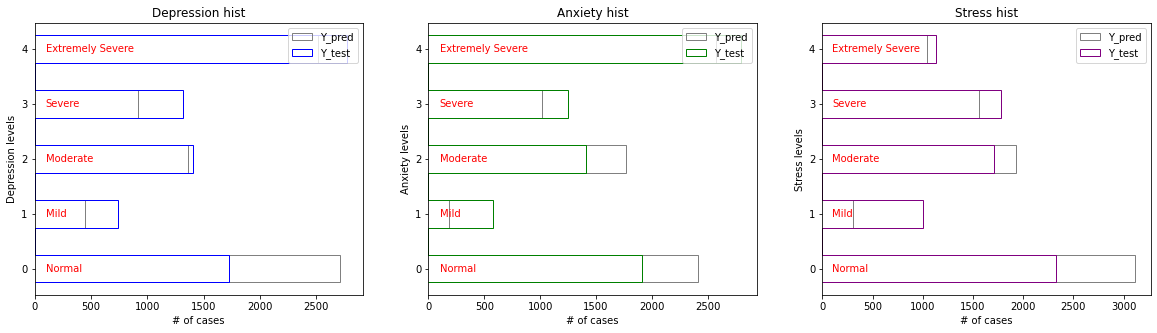

In [38]:
Y_pred_DT = fn.classification(DT, X_train, X_test, Y_train, Y_test, index_training)

After using the `classification()` function it was found that:
* in depression prediction the results are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.4186046511627907.
    * a good agreement between predictions and truths can be seen in the histograms.
* in anxiety prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.5971087366436204.
    * an excellent agreement between predictions and truths can be seen in the histograms.
* in stress prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.522438717787555.
    * a good agreement between predictions and truths can be seen in the histograms.
    
The total model performance is 0.5127173685313221.

## <font color='blue'>SVM Classification</font> <a id='SVM'></a>
The training data consists of $N$ pairs $(x_1,y_1),(x_2,y_2),\dots,(x_N,y_N)$, with $x_i\epsilon\mathbb{R}^p$ and $y_i\epsilon\{−1, 1\}$. Define a hyperplane by

$$
\{x : f(x) = x^T\beta+\beta_0 = 0\}
$$

where $\beta$ is a unit vector: $||\beta|| = 1$. A classification rule induced by $f(x)$ is

$$
G(x) = sign[x^T\beta + \beta_0].
$$

$f(x)$ gives the signed distance from a point $x$ to the hyperplane $f(x) = x^T\beta +\beta_0 = 0$. Since the classes are separable, we can find a function $f(x) = x^T\beta + \beta_0$ with $y_if(x_i) > 0\ \forall i$ can be found. Hence the hyperplane that creates the biggest margin between the training points for class 1 and −1 can be found ([Figure](SVMfig)).
<img src="Image/SVM.png" width="700"><a id='SVMfig'></a>

The optimization problem is

$$
max_{\beta,\beta_0,||\beta||=1} M
$$

$$
subject\ to\ y_i(x_i^T\beta+\beta_0)\geq M,\ i=1,\dots,N
$$

these are the $\textit{Hard conditions}$. Suppose now that the classes overlap in feature space. One way to deal
with the overlap is to still maximize $M$, but allow for some points to be on the wrong side of the margin. Define the slack variables $\xi = (\xi_1,\xi_2,\dots,\xi_N)$. The previous constraints are therefore modified:

$$
y_i(x_i^T\beta+\beta_0)\geq M(1-\xi_i)
$$

$$
\forall i \ \xi_i\geq0,\ \sum_{i=1}^{N}\xi_i\leq const
$$

These constraints are the $\textit{soft condition}$, the "standard" support vector classifier (SVC). The value $\xi_i$ in the constraint $y_i(x^T_i\beta+\beta_0)\geq M(1 − \xi_i)$ is the proportional amount by which the prediction $f(x_i) = x^T_i\beta + \beta_0$ is on the wrong side of its margin. Hence by bounding the
sum $\sum\xi_i$, the total proportional amount by which predictions fall on the wrong side of their margin is bounded. Misclassifications occur when $\xi_i > 1$, so bounding $\sum\xi_i$ at a value $K$ say, bounds the total number of training misclassifications at $K$. We can drop the norm constraint on $\beta$, define $M = 1/||β||$, and write the previous disequation in the equivalent form

$$
min||\beta||\ subjet\ to\ \Bigg\{ \begin{array}{r}
                                    y_i(x_i^T\beta+\beta_0)\geq 1-\xi_i\ \forall\ i\\
                                    \xi_i\geq0,\ \sum\xi_i\leq C\\
                                  \end{array}
$$

Therefore $\xi$, $\beta$ and $\beta_0$ are obtained by minimising the cost function $K$:

$$
\xi_i,\ \beta,\ \beta_0 = argmin\{K\}
$$ 

where $K$ is

$$
K = \frac{1}{2}||\underline{\beta}||^2 + C\sum_{i=1}^{N}\xi_i
$$

Using the support vector machine classifier where the dimension of the enlarged space is very large, infinite in some cases, the computations would become prohibitive. When the SVC computational cost is too high, due to the large number of sizes and features, kernels are used (cap 12.3 ref. below)

The Sklearn tool `SVC(C=50)` with default settings and the regularization parameter $C=50$ (it was chosen equal 50 based on the model performance), was used to create the model. The model performances were evaluated as Linear regression and the degrees of freedom analysis was done as [GBN analysis](#GDL).

(see [T. Hastie, R. Tibshirani, J. Friedman, "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." cap 12.1-12.3](https://hastie.su.domains/ElemStatLearn/))

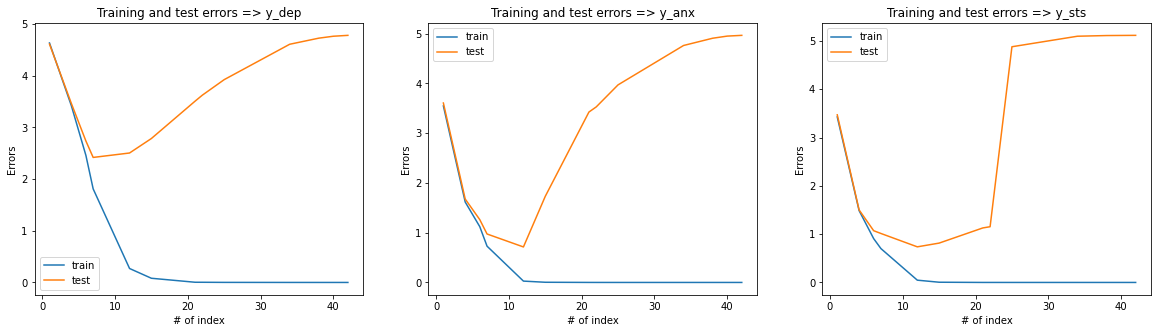

In [56]:
svc = SVC(C=50)
fn.error_show(svc, data, X_train, X_test, Y_train, Y_test)

* In the depression prediction, in order to avoid overfitting and the increasing of the difference between test and training errors , the best choice of degrees of freedom is 7.
* In anxiety prediction, in order to avoid overfitting and the increasing of the difference between test and training errors , the best choice of degrees of freedom is 7.
* In stress prediction, in order to avoid overfitting and the increasing of the difference between test and training errors , the best choice of degrees of freedom is 4.

In [8]:
index_dep = fn.index_reduction(data,0.54)
print(len(index_dep))
index_anx = fn.index_reduction(data,0.54)
print(len(index_anx))
index_sts = fn.index_reduction(data,0.48)
print(len(index_sts))

index_training = [index_dep, index_anx, index_sts]

7
7
4


* y_dep


The model performance for training set
--------------------------------------
RMSE is 1.34523158605243
R2 score is 0.25355638264339886


The model performance for testing set
--------------------------------------
RMSE is 1.554943860256081
R2 score is -0.004869443950568764


0.4458830923947203
######################################


* y_anx


The model performance for training set
--------------------------------------
RMSE is 0.8535060976379822
R2 score is 0.712625127469467


The model performance for testing set
--------------------------------------
RMSE is 0.9865850669254663
R2 score is 0.6111431260722585


0.6140791954745443
######################################


* y_sts


The model performance for training set
--------------------------------------
RMSE is 1.2196021030462645
R2 score is 0.27872572873341606


The model performance for testing set
--------------------------------------
RMSE is 1.2253861998491093
R2 score is 0.26613827784980193


0.4781898177247014
####

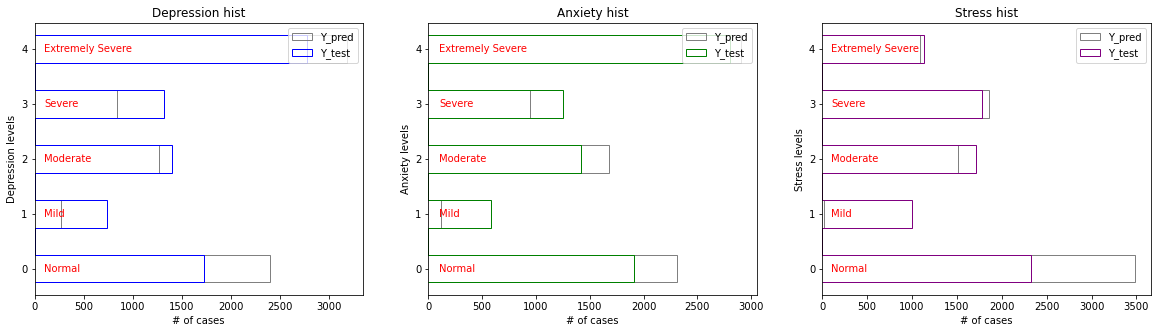

In [60]:
Y_pred_svm = fn.classification(svc, X_train, X_test, Y_train, Y_test, index_training)

After using the `classification()` function it was found that:
* in depression prediction the results are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.4458830923947203.
    * a good agreement between predictions and truths can be seen in the histograms.
* in anxiety prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.6140791954745443.
    * an excellent agreement between predictions and truths can be seen in the histograms.
* in stress prediction the best cut and performance are:
    * the train and test errors are similar so the model is not in a overfitting condition.
    * the performance is 0.4781898177247014.
    * an almost perfect agreement between predictions and truths can be seen in the histograms.
    
The total model performance is 0.512717368531322.

## <font color='green'>Results</font>
Once the models have been created, their predictions are compared. In histograms, the true levels of the various diseases (`y_true`) and the levels predicted by the various models (`y_pred`) are displayed in comparison.

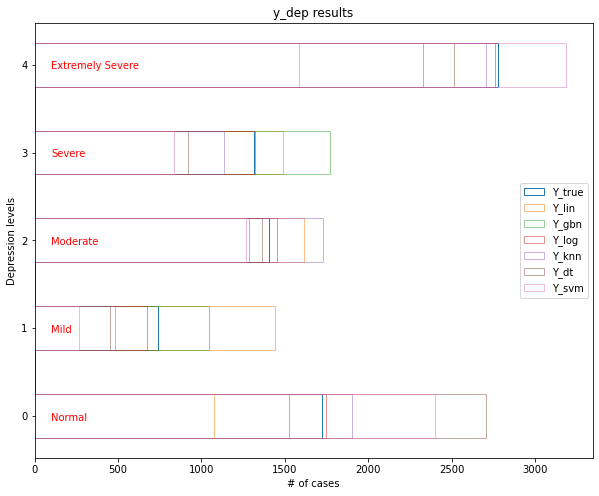

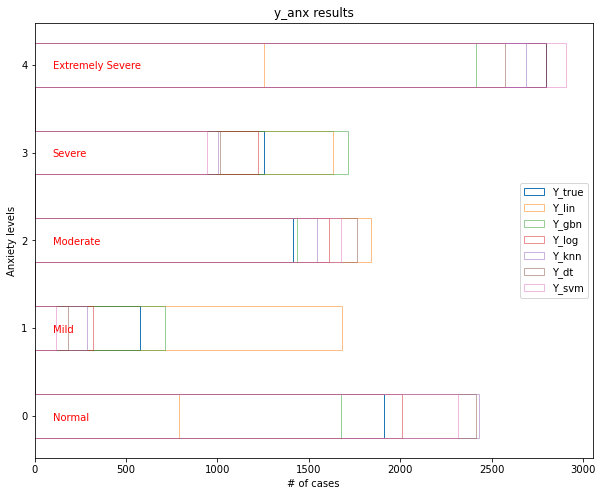

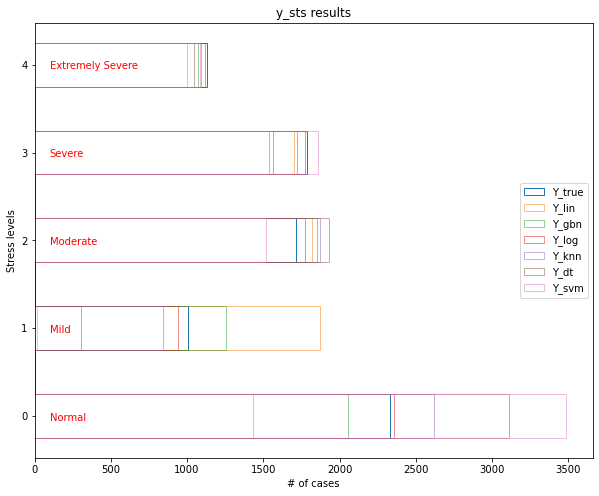

In [13]:
results = fn.show_results(Y_test, Y_pred_lin, Y_pred_GBN, Y_pred_log, Y_pred_KNN, Y_pred_DT, Y_pred_svm)

Then also the performance and accuracy of the various models are compared and it is found that:
* in predicting levels of depression the best classification method is the $\textbf{Logistic Regression}$;
* in predicting levels of anxiety the best classification method is still the $\textbf{Logistic Regression}$;
* in predicting levels of stress the best classification method is the $\textbf{Linear Regression}$;

$\Longrightarrow$ the absolute best model is therefore the $\textbf{Logistic Regression}$.

In [14]:
results.style.background_gradient(cmap='coolwarm')

,dep_acc,anx_acc,sts_acc,tot_acc
lin,0.718542,0.572973,0.858077,0.716530
GBN,0.744563,0.730987,0.736015,0.737188
log,0.834569,0.806662,0.842615,0.827949
KNN,0.821496,0.712885,0.760905,0.765095
DT,0.418605,0.597109,0.522439,0.512717
SVM,0.445883,0.614079,0.478190,0.512717


## <font color='Grey'>Backup</font>
To due the high computational cost, the results were saved and it is possible to upload them directly.

### Saving

In [39]:
X_train.to_csv('Data/X_train.csv')
Y_train.to_csv('Data/Y_train.csv')
X_test.to_csv('Data/X_test.csv')
Y_test.to_csv('Data/Y_test.csv')

In [64]:
Y_pred_lin.to_csv('Data/Y_pred_lin.csv')
Y_pred_GBN.to_csv('Data/Y_pred_GBN.csv')
Y_pred_log.to_csv('Data/Y_pred_log.csv')
Y_pred_KNN.to_csv('Data/Y_pred_KNN.csv')
Y_pred_DT.to_csv('Data/Y_pred_DT.csv')
Y_pred_svm.to_csv('Data/Y_pred_svm.csv')

In [15]:
results.to_csv('Data/results.csv')

### Uploading

In [6]:
X_train = pd.read_csv('Data/X_train.csv')
Y_train = pd.read_csv('Data/Y_train.csv')
X_test = pd.read_csv('Data/X_test.csv')
Y_test = pd.read_csv('Data/Y_test.csv')

In [12]:
Y_pred_lin = pd.read_csv('Data/Y_pred_lin.csv')
Y_pred_GBN = pd.read_csv('Data/Y_pred_GBN.csv')
Y_pred_log = pd.read_csv('Data/Y_pred_log.csv')
Y_pred_KNN = pd.read_csv('Data/Y_pred_KNN.csv')
Y_pred_DT = pd.read_csv('Data/Y_pred_DT.csv')
Y_pred_svm = pd.read_csv('Data/Y_pred_svm.csv')

In [ ]:
results = pd.read_csv('Data/results.csv')

## <font color='Grey'>References</font>
1. [Taylor, J. (1953). "A personality scale of manifest anxiety". The Journal of Abnormal and Social Psychology, 48(2), 285-290.](https://psycnet.apa.org/doi/10.1037/h0056264).
2. [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html) libraries, available online.
3. [Python](https://www.python.org/), [Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/),[Seaborn](https://seaborn.pydata.org/), and [Sklearn](https://scikit-learn.org/stable/index.html) libraries, available online.
4. [T. Hastie, R. Tibshirani, J. Friedman, "The Elements of Statistical Learning: Data Mining, Inference, and Prediction."](https://hastie.su.domains/ElemStatLearn/)